Model sensitivity to different values of horizontal and vertical prescribed diffusivity coefficients.

Sensitivity to Explicit Diffusivity Coefficients
============================

This ipython notebook investigates the model sensitivity to different values of horizontal and vertical prescribed diffusivity coeffiecients. Experiment 360x360x90_BodyForcing_6tr_LinProfiles has upwelling body forcing and a vertical gradient in the initial tracer concentration. Run02 explores values of vertical diffusivity (1E-7 to 10) keeping horizontal diffusivity fixed (1E-5).

In [2]:
#KRM
import os

import numpy as np

import matplotlib.pyplot as plt

from scipy.stats import nanmean

from math import *

%matplotlib inline

import numpy as np

import matplotlib.colors as mcolors

from netCDF4 import Dataset

import pylab as pl

from decimal import getcontext, Decimal, Inexact

import statsmodels.api as sm

import pandas as pd

In [3]:
#lib_path = os.path.abspath('../PythonModulesMITgcm') # Add absolute path to my python scripts
#sys.path.append(lib_path)

import NumDiffTools as dif

Important input parameters:
------------------------

In [4]:
nx = 360  # number of x points in domain
ny = 360  # number of y points in domain
nz = 90  # number of z levels in domain
nt = 21   # number of output files (n time) 
delt= 12*3600.0 # time interval between model output

Load output filenames:


In [5]:
### Load output filenames ###

filename = '/ocean/kramosmu/MITgcm/CanyonUpwelling/360x360x90_BodyForcing_6Tr_LinProfiles/run07notave/state.0000000000.glob.nc'
StateOut = Dataset(filename)
#for dimobj in StateOut.variables.values():
#    print dimobj

filename2 = '/ocean/kramosmu/MITgcm/CanyonUpwelling/360x360x90_BodyForcing_1Tr/run01/mnc_0001/grid.t001.nc'
GridOut = Dataset(filename2)
#for dimobj in GridOut.variables.values():
#    print dimobj

filename3 = '/ocean/kramosmu/MITgcm/CanyonUpwelling/360x360x90_BodyForcing_6Tr_LinProfiles/run07notave/ptracers.0000000000.glob.nc'
PtracersOut = Dataset(filename3)
#for dimobj in PtracersOut.variables.values():
#    print dimobj


Vertical diffusivity Sensitivity
--------------------

Let's calculate the horizontal and vertical diffusivity for T and S.

In [6]:
tracer1 = dif.getField(filename,'Temp')

tracer1msk = np.ma.masked_values(tracer1, 0)

MASK = np.ma.getmask(tracer1msk)
   
    
tracer2 = dif.getField(filename,'S')

tracer2msk = np.ma.masked_values(tracer2, 0)






Calculate the volume of the domain


In [7]:
DomVol = 0.0
    
hFacC = dif.getField(filename2,'HFacC')
drF   = dif.getField(filename2,'drF')
rAC   = dif.getField(filename2,'rA')
    
for jj in np.arange(ny):
    for kk in np.arange(nz):
      DomVol = DomVol + hFacC[kk,jj,:]*drF[kk]*rAC[jj,:]
    #print DomVol
  #print('\n The total volume is %e m^3 \n' %DomVolume)
   
DomVolume=sum(DomVol)
print DomVolume  
#vol = dif.CalcDomVolume(filename2, nx, ny, nz)

#DomVolume = vol[0]
#hFacC = vol[1]
#drF = vol[2]
#rAC = vol[3]

#print(DomVolume)

6.10285330795e+12


Temperature


In [8]:
q2mean1 = dif.CalcVariance(nt, nz, ny, nx, DomVolume, hFacC, drF, rAC, tracer1)
print('done')
dqdt1 = dif.CalcTimeDer(q2mean1, nt, delt)
print('done')
qmeanDh1 = dif.CalcAvgHorGrad(filename2, nt,nz,ny,nx,tracer1,DomVolume,hFacC, drF, rAC)
print('done')
qmeanDz1=dif.CalcAvgVerGrad(filename2, nt,nz,ny,nx,tracer1,DomVolume,hFacC, drF, rAC)
print('done')

esth1=dif.FitDiffusivity(qmeanDh1[1:len(qmeanDh1)-1],dqdt1[0:len(dqdt1)], delt)
print(esth1.params)

estv1=dif.FitDiffusivity(qmeanDz1[1:len(qmeanDz1)-1],dqdt1[0:len(dqdt1)], delt)
print(estv1.params)

print esth1.summary()
print estv1.summary()

done
done
done
done
[-0.20834655]
[ -3.43521913e-06]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     512.3
Date:                Thu, 15 Jan 2015   Prob (F-statistic):           1.13e-14
Time:                        12:22:45   Log-Likelihood:                 297.98
No. Observations:                  19   AIC:                            -594.0
Df Residuals:                      18   BIC:                            -593.0
Df Model:                           1                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1            -0.2083      0.009    -22.634      0.000        -0.228    -0.189

/home/kramosmu/anaconda/lib/python2.7/site-packages/scipy/stats/stats.py:1276: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  int(n))


Salinity

In [9]:
q2mean2 = dif.CalcVariance(nt, nz, ny, nx, DomVolume, hFacC, drF, rAC, tracer2)
print('done')
dqdt2 = dif.CalcTimeDer(q2mean2, nt, delt)
print('done')
qmeanDh2 = dif.CalcAvgHorGrad(filename2, nt,nz,ny,nx,tracer2,DomVolume,hFacC, drF, rAC)
print('done')
qmeanDz2=dif.CalcAvgVerGrad(filename2, nt,nz,ny,nx,tracer2,DomVolume,hFacC, drF, rAC)
print('done')

esth2=dif.FitDiffusivity(qmeanDh2[1:len(qmeanDh2)-1],dqdt2[0:len(dqdt2)], delt)
print(esth2.params)

estv2=dif.FitDiffusivity(qmeanDz2[1:len(qmeanDz2)-1],dqdt2[0:len(dqdt2)], delt)
print(estv2.params)

print esth2.summary()
print estv2.summary()

done
done
done
done
[ 0.00720116]
[  2.90003441e-07]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     300.3
Date:                Thu, 15 Jan 2015   Prob (F-statistic):           1.13e-12
Time:                        13:09:39   Log-Likelihood:                 303.78
No. Observations:                  19   AIC:                            -605.6
Df Residuals:                      18   BIC:                            -604.6
Df Model:                           1                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.0072      0.000     17.329      0.000         0.006     0.008

Tracer variance plots:
--------------------

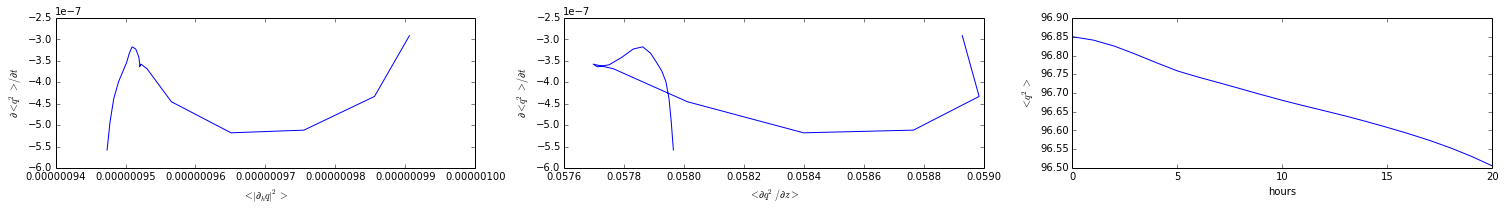

In [10]:
kh1=esth1.params
kv1=estv1.params





fig1=plt.figure(figsize=(21,3))

plt.subplot(1,3,1)
ax=plt.gca()


plt.plot(qmeanDh1[1:len(qmeanDh1)-1],dqdt1)




plt.xlabel('$<|\partial_{h}q|^2>$')

plt.ylabel('$\partial{<q^2>}/\partial{t}$')
    

plt.subplot(1,3,2)
ax=plt.gca()

plt.plot(qmeanDz1[1:len(qmeanDz1)-1],dqdt1)



plt.xlabel('$<\partial{q^2}/\partial{z}>$')

plt.ylabel('$\partial{<q^2>}/\partial{t}$')

plt.subplot(1,3,3)
ax=plt.gca()


plt.plot(np.arange(0,nt,1),q2mean1)





plt.xlabel('hours')

plt.ylabel('$<q^2>$')

plt.tight_layout()

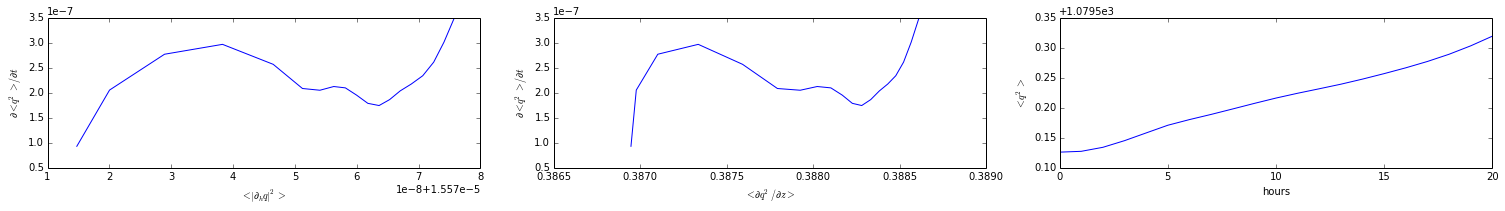

In [11]:




kh2=esth2.params
kv2=estv2.params



fig1=plt.figure(figsize=(21,3))

plt.subplot(1,3,1)
ax=plt.gca()



plt.plot(qmeanDh2[1:len(qmeanDh2)-1],dqdt2)



plt.xlabel('$<|\partial_{h}q|^2>$')

plt.ylabel('$\partial{<q^2>}/\partial{t}$')
    

plt.subplot(1,3,2)
ax=plt.gca()


plt.plot(qmeanDz2[1:len(qmeanDz2)-1],dqdt2)


plt.xlabel('$<\partial{q^2}/\partial{z}>$')

plt.ylabel('$\partial{<q^2>}/\partial{t}$')

plt.subplot(1,3,3)
ax=plt.gca()



plt.plot(np.arange(0,nt,1),q2mean2)




plt.xlabel('hours')

plt.ylabel('$<q^2>$')

plt.tight_layout()
